# 4장 데이터 전처리

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.family']='Malgun Gothic'
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_pickle('../data/MCR2019.pkl')
df['구매'] = df.iloc[:,-1]
df.shape
df.head()

(4000, 39)

,성별,연령(1세),지역(권역),직업,가구 월평균 소득(1),최종학력,주거 형태,결혼 여부,자녀 총 수,평일 인터넷 이용시간(분),...,TV 시청 시 즐겨 보는 국내 드라마 장르-내용.2,TV 시청 시 즐겨 보는 국내 드라마 장르-내용.3,TV 시청 시 즐겨 보는 국내 드라마 장르-내용.4,TV 시청 시 즐겨 보는 국내 드라마 장르-내용.5,TV 시청 시 즐겨 보는 국내 드라마 장르-내용.6,TV 시청 시 즐겨 보는 국내 드라마 장르-내용.7,TV 시청 시 즐겨 보는 국내 드라마 장르-내용.8,TV 시청 시 즐겨 보는 국내 드라마 장르-내용.9,PPL(간접광고) 평가 - 제품/브랜드 구매의향,구매
0,1,14,1,6,6,8,3,2,99,0.0,...,10.0,13,NaN,NaN,NaN,NaN,NaN,NaN,4,4
1,1,14,1,6,6,8,1,2,99,30.0,...,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2
2,1,14,1,6,6,8,2,2,99,90.0,...,12.0,14,NaN,NaN,NaN,NaN,NaN,NaN,5,5
3,1,14,1,6,8,8,1,2,99,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2
4,1,14,1,6,9,8,1,2,99,0.0,...,10.0,11,NaN,NaN,NaN,NaN,NaN,NaN,3,3


## 4.1 결측치(missing value) 대체

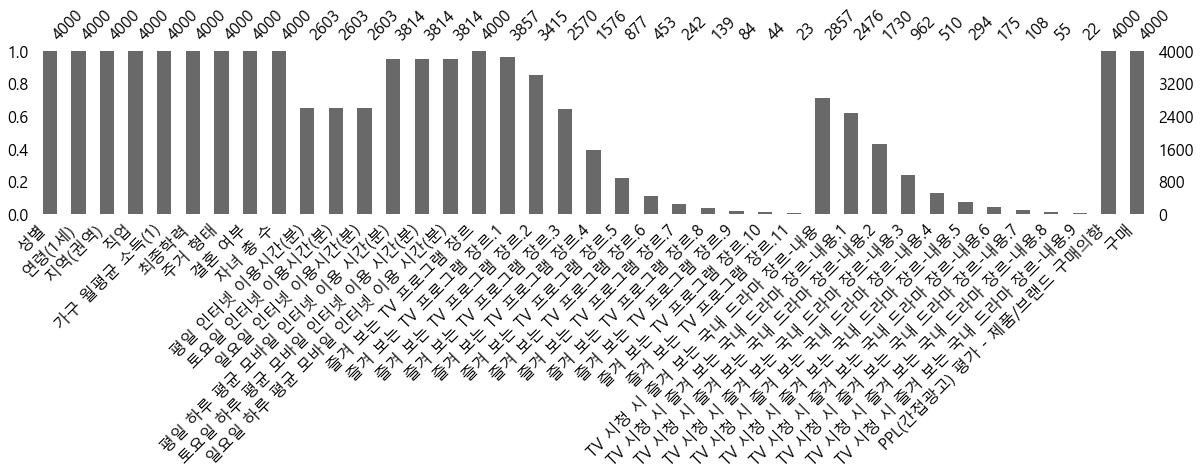

In [3]:
import missingno as msno 
msno.bar(df, figsize=(20,3)) 

In [4]:
def summary(df) :
    tf = pd.DataFrame({'데이터형태(dtypes)' : df.dtypes,
                       '비 결측치 수(notnull': df.notnull().sum(),
                       '결측치 수(null)' : df.isnull().sum(),
                       '고유값 수(nunique)' : df.nunique()})
    return tf
summary(df)

,데이터형태(dtypes),비 결측치 수(notnull,결측치 수(null),고유값 수(nunique)
성별,int64,4000,0,2
연령(1세),int64,4000,0,57
지역(권역),int64,4000,0,7
직업,int64,4000,0,7
가구 월평균 소득(1),int64,4000,0,12
최종학력,int64,4000,0,12
주거 형태,int64,4000,0,5
결혼 여부,int64,4000,0,3
자녀 총 수,int64,4000,0,4
평일 인터넷 이용시간(분),float64,2603,1397,37


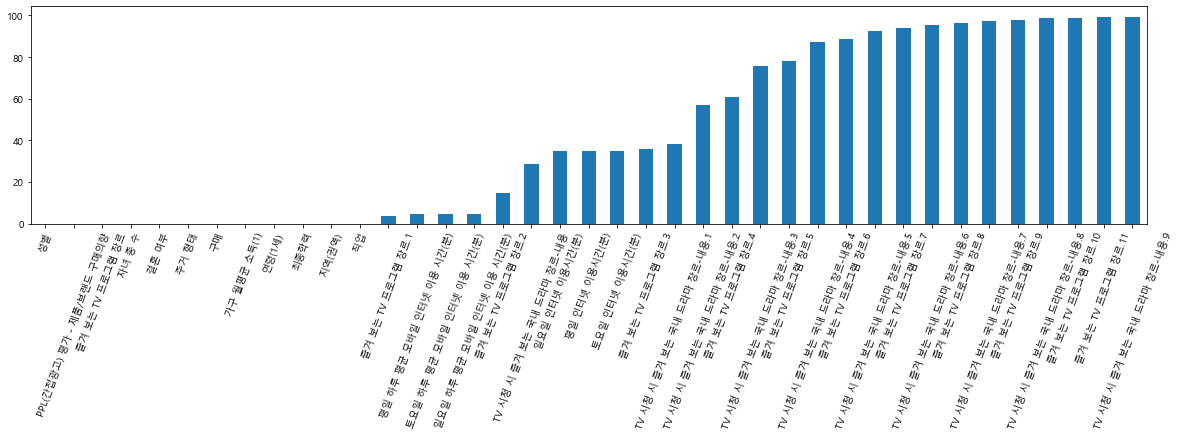

In [5]:
null_percent = df.isnull().mean()*100
null_percent.sort_values().plot.bar(figsize=(20,4), rot='70')

In [6]:
print('결측치 처리 전 df shape : ', df.shape)
null_filtered = null_percent[null_percent > 60].index
df = df.drop(null_filtered, axis =1) # df.drop(missing_col, axis =1, inplace=True)
print('결측치 처리 후 df shape : ', df.shape)

결측치 처리 전 df shape :  (4000, 39)
결측치 처리 후 df shape :  (4000, 24)


In [7]:
df.columns

Index(['성별', '연령(1세)', '지역(권역)', '직업', '가구 월평균 소득(1)', '최종학력', '주거 형태',
       '결혼 여부', '자녀 총 수', '평일 인터넷 이용시간(분)', '토요일 인터넷 이용시간(분)',
       '일요일 인터넷 이용시간(분)', '평일 하루 평균 모바일 인터넷 이용 시간(분)',
       '토요일 하루 평균 모바일 인터넷 이용 시간(분)', '일요일 하루 평균 모바일 인터넷 이용 시간(분)',
       '즐겨 보는 TV 프로그램 장르', '즐겨 보는 TV 프로그램 장르.1', '즐겨 보는 TV 프로그램 장르.2',
       '즐겨 보는 TV 프로그램 장르.3', 'TV 시청 시 즐겨 보는 국내 드라마 장르-내용',
       'TV 시청 시 즐겨 보는 국내 드라마 장르-내용.1', 'TV 시청 시 즐겨 보는 국내 드라마 장르-내용.2',
       'PPL(간접광고) 평가 - 제품/브랜드 구매의향', '구매'],
      dtype='object')

In [8]:
col_name = ['성별', '연령', '지역', '직업', '가구소득', '학력', '주거형태', '결혼', '자녀수', 
            '인터넷평일', '인터넷주말', '인터넷휴일', '모바일평일', '모바일주말', '모바일휴일',
            'TV1', 'TV2', 'TV3', 'TV4', '드라마1', '드라마2', '드라마3', '구매의향', '구매']
df.columns = col_name
del df['구매의향']

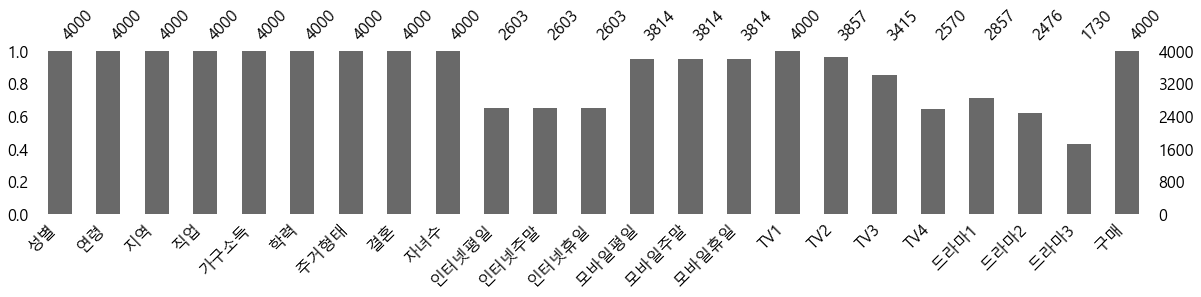

In [9]:
msno.bar(df, figsize=(20,3))

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 23 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   성별      4000 non-null   int64  
 1   연령      4000 non-null   int64  
 2   지역      4000 non-null   int64  
 3   직업      4000 non-null   int64  
 4   가구소득    4000 non-null   int64  
 5   학력      4000 non-null   int64  
 6   주거형태    4000 non-null   int64  
 7   결혼      4000 non-null   int64  
 8   자녀수     4000 non-null   int64  
 9   인터넷평일   2603 non-null   float64
 10  인터넷주말   2603 non-null   float64
 11  인터넷휴일   2603 non-null   float64
 12  모바일평일   3814 non-null   float64
 13  모바일주말   3814 non-null   float64
 14  모바일휴일   3814 non-null   float64
 15  TV1     4000 non-null   int64  
 16  TV2     3857 non-null   float64
 17  TV3     3415 non-null   float64
 18  TV4     2570 non-null   float64
 19  드라마1    2857 non-null   float64
 20  드라마2    2476 non-null   float64
 21  드라마3    1730 non-null   float64
 22  

In [11]:
Nums = ['연령', '가구소득', '학력', '자녀수', '인터넷평일', '인터넷주말', '인터넷휴일',
         '모바일평일', '모바일주말', '모바일휴일', '구매']
Cats = [item for item in df.columns if item not in Nums]
for col in Nums : 
        df[col] = df[col].astype('float64')
for col in Cats : 
        df[col] = df[col].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 23 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   성별      4000 non-null   category
 1   연령      4000 non-null   float64 
 2   지역      4000 non-null   category
 3   직업      4000 non-null   category
 4   가구소득    4000 non-null   float64 
 5   학력      4000 non-null   float64 
 6   주거형태    4000 non-null   category
 7   결혼      4000 non-null   category
 8   자녀수     4000 non-null   float64 
 9   인터넷평일   2603 non-null   float64 
 10  인터넷주말   2603 non-null   float64 
 11  인터넷휴일   2603 non-null   float64 
 12  모바일평일   3814 non-null   float64 
 13  모바일주말   3814 non-null   float64 
 14  모바일휴일   3814 non-null   float64 
 15  TV1     4000 non-null   category
 16  TV2     3857 non-null   category
 17  TV3     3415 non-null   category
 18  TV4     2570 non-null   category
 19  드라마1    2857 non-null   category
 20  드라마2    2476 non-null   category
 21  드라마3    1730 n

In [12]:
','.join(set(df.columns))
len(set(df.columns))
','.join(set(Nums))
len(set(Nums))
','.join(set(Cats))
len(set(Cats))

'결혼,구매,TV3,모바일주말,TV2,드라마1,주거형태,TV4,인터넷주말,모바일휴일,연령,지역,드라마2,직업,자녀수,TV1,드라마3,성별,모바일평일,인터넷휴일,가구소득,학력,인터넷평일'

23

'모바일평일,인터넷휴일,인터넷주말,가구소득,구매,자녀수,학력,연령,모바일주말,모바일휴일,인터넷평일'

11

'결혼,TV4,드라마2,직업,TV3,TV2,드라마1,주거형태,드라마3,성별,지역,TV1'

12

In [13]:
set(df.columns) | set(Nums) == set(df.columns)
set(df.columns) & set(Nums) == set(Nums)
set(df.columns) & set(Cats) == set(Cats) 
set(df.columns) - set(Nums) - set(Cats)

True

True

True

set()

In [14]:
summary(df)

,데이터형태(dtypes),비 결측치 수(notnull,결측치 수(null),고유값 수(nunique)
성별,category,4000,0,2
연령,float64,4000,0,57
지역,category,4000,0,7
직업,category,4000,0,7
가구소득,float64,4000,0,12
학력,float64,4000,0,12
주거형태,category,4000,0,5
결혼,category,4000,0,3
자녀수,float64,4000,0,4
인터넷평일,float64,2603,1397,37


In [15]:
df['지역'] = df['지역'].map({1:'서울', 2:'경기인천', 3:'대전충청세종', 4:'광주전라제주', 
                         5:'부산울산경남', 6:'대구경북', 7:'강원'})

df['직업'] = df['직업'].map({1:'행정관리전문직', 2:'사무직', 3:'판매서비스직', 4:'기능노무직', 
                         5:'전업주부', 6:'학생재수생', 7:'무직기타'})

df['결혼'] = df['결혼'].map({1:'기혼', 2:'미혼', 3:'기타_이혼별거사별'})

In [16]:
df['학력'] = df['학력'].map({1:'정규교육없음', 2:'초등학교졸업', 3:'중학교졸업', 
                         4:'고등학교졸업', 5:'전문대학졸업', 6:'대학교졸업', 7:'대학원졸업', 
                         8:'중학교재학', 9:'고등학교재학', 10:'전문대학재학', 
                         11:'대학교재학', 12:'대학원재학'})

df['주거형태'] = df['주거형태'].map({1:'자가', 2:'전세', 3:'월세', 4:'영구임대', 5:'사택기타'})

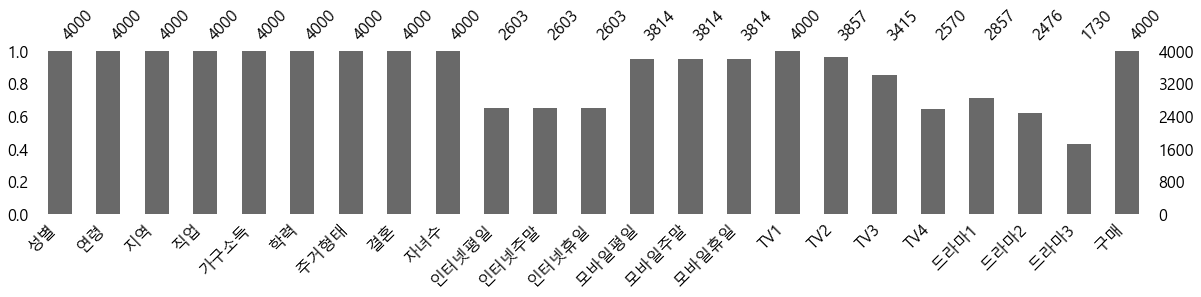

In [17]:
msno.bar(df, figsize=(20,3))

Text(0.5, 0, '연령')

Text(0, 0.5, '인터넷평일')

Text(0.5, 1.0, '연령과 인터넷평일(결측치자료 빈도)의 분포 형태')

Text(0.5, 0, '연령')

Text(0, 0.5, '인터넷주말')

Text(0.5, 1.0, '연령과 인터넷주말(결측치자료 빈도)의 분포 형태')

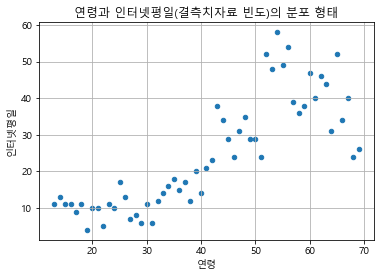

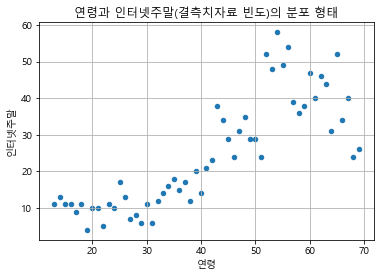

In [18]:
for col in ['인터넷평일', '인터넷주말']:
    df[df[col].isnull()]['연령'].value_counts().reset_index().plot.scatter(x='index',y='연령')
    plt.xlabel('연령')
    plt.ylabel(col)
    plt.title('연령과 '+ col+'(결측치자료 빈도)의 분포 형태')
    plt.grid(True)

In [19]:
over_40 = (df['연령'] >= 40); under_40 = (df['연령'] < 40)
cols = ['인터넷평일','인터넷주말','인터넷휴일','모바일평일','모바일주말','모바일휴일']
for col in cols :
    df.loc[over_40, col] = df.loc[over_40, col].fillna(df.loc[over_40,col].mean())
    df.loc[under_40, col] = df.loc[under_40, col].fillna(df.loc[under_40,col].mean())

In [20]:
col_02 = ['TV2', 'TV3', 'TV4', '드라마1', '드라마2', '드라마3']
for col in col_02 :
    df[col].fillna(df[col].mode()[0], inplace=True)

In [21]:
print('nan, inf & -inf 의 개수는 ?  ', df.isin([np.nan, np.inf, -np.inf]).any(1).sum())

nan, inf & -inf 의 개수는 ?   0


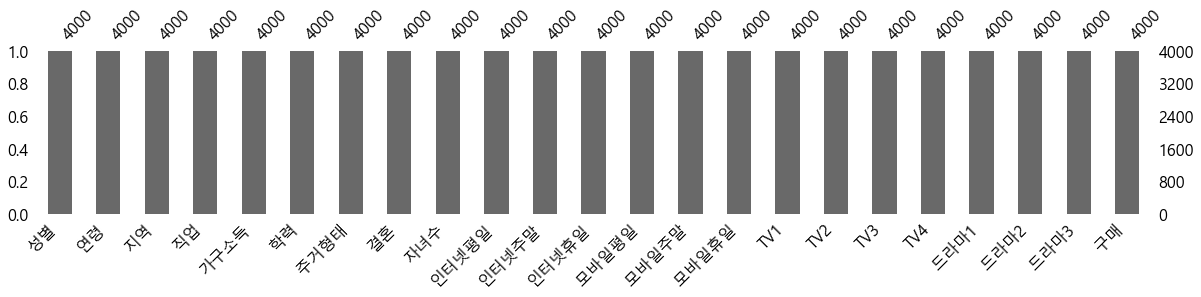

In [22]:
msno.bar(df, figsize=(20,3))

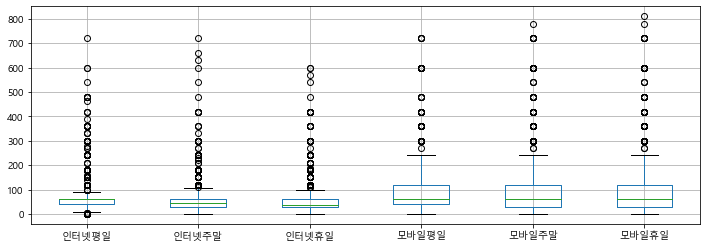

In [23]:
suspects = ['인터넷평일', '인터넷주말', '인터넷휴일', '모바일평일', 
           '모바일주말', '모바일휴일']
df.boxplot(column=suspects , figsize=(12,4))

In [24]:
q1, q3 = df['인터넷평일'].quantile(0.15), df['인터넷평일'].quantile(0.95)
iqr = q3 - q1
l_fence, u_fence = q1 - 1.5*iqr , q3 + 1.5*iqr   
outliers = df['인터넷평일'][(df['인터넷평일'] < l_fence) | (df['인터넷평일'] > u_fence)]
outliers.shape
outliers.head(10)
outliers.index
outliers.values

(40,)

23     300.0
37     300.0
115    330.0
151    480.0
163    540.0
186    360.0
225    270.0
235    480.0
242    300.0
252    360.0
Name: 인터넷평일, dtype: float64

Int64Index([  23,   37,  115,  151,  163,  186,  225,  235,  242,  252,  277,
             290,  307,  337,  359,  363,  481,  545,  592,  662, 1374, 1375,
            1474, 1480, 1486, 1911, 1913, 1952, 2102, 2174, 2259, 2287, 2356,
            2416, 2425, 2571, 2789, 2915, 3041, 3442],
           dtype='int64')

array([300., 300., 330., 480., 540., 360., 270., 480., 300., 360., 390.,
       600., 300., 300., 360., 330., 330., 600., 280., 480., 420., 300.,
       360., 360., 420., 480., 360., 270., 480., 465., 300., 360., 270.,
       360., 300., 300., 300., 300., 420., 720.])

In [25]:
def Outliers(col):
    q1, q3 =col.quantile(0.15), col.quantile(0.95)
    iqr = q3 - q1
    l_fence, u_fence = q1 - 1.5*iqr , q3 + 1.5*iqr  
    outliers = col[(col < l_fence) | (col > u_fence)]
    col[(col < l_fence)] = l_fence
    col[(col > u_fence)] = u_fence  
    print(col.name,'의 총 이상치 관측 수:', outliers.count())
    print('Lower fence: ', l_fence, 'Upper fence: ', u_fence)
    return col
for col in suspects :
    df[col] = Outliers(df[col])

인터넷평일 의 총 이상치 관측 수: 40
Lower fence:  -105.0 Upper fence:  255.0
인터넷주말 의 총 이상치 관측 수: 24
Lower fence:  -130.0 Upper fence:  270.0
인터넷휴일 의 총 이상치 관측 수: 20
Lower fence:  -180.0 Upper fence:  300.0
모바일평일 의 총 이상치 관측 수: 28
Lower fence:  -195.0 Upper fence:  405.0
모바일주말 의 총 이상치 관측 수: 23
Lower fence:  -285.0 Upper fence:  555.0
모바일휴일 의 총 이상치 관측 수: 25
Lower fence:  -285.0 Upper fence:  555.0


In [26]:
print('nan, inf & -inf 의 개수는 ?  ', df.isin([np.nan, np.inf, -np.inf]).any(1).sum())

nan, inf & -inf 의 개수는 ?   0


In [27]:
df.max()

성별             2
연령            69
지역            서울
직업       행정관리전문직
가구소득          99
학력        초등학교졸업
주거형태          전세
결혼            미혼
자녀수           99
인터넷평일        255
인터넷주말        270
인터넷휴일        300
모바일평일        405
모바일주말        555
모바일휴일        555
TV1           99
TV2           17
TV3           16
TV4           16
드라마1          16
드라마2          15
드라마3          16
구매             6
dtype: object

In [28]:
for col in df.columns :
    if df[(df[col] == 99)].shape[0] > 0 :
        col, df[df[col] == 99].shape[0]
        df[col].value_counts().index
        df[col].value_counts().values

('가구소득', 2)

Float64Index([6.0, 5.0, 4.0, 7.0, 3.0, 8.0, 9.0, 2.0, 11.0, 10.0, 1.0, 99.0], dtype='float64')

array([969, 772, 600, 487, 398, 278, 189, 118,  90,  51,  46,   2],
      dtype=int64)

('자녀수', 1524)

Float64Index([2.0, 99.0, 1.0, 3.0], dtype='float64')

array([1715, 1524,  585,  176], dtype=int64)

('TV1', 1)

CategoricalIndex([1, 4, 7, 2, 6, 3, 5, 9, 10, 8, 99, 12], categories=[1, 2, 3, 4, 5, 6, 7, 8, ...], ordered=False, dtype='category')

array([2899,  511,  262,  117,  104,   56,   26,   15,    6,    2,    1,
          1], dtype=int64)

In [29]:
df['자녀수'] = df['자녀수'].apply(lambda x: 0 if x == 99 else x)
df.drop(df.loc[df['가구소득'] == 99].index, inplace = True)
df.drop(df.loc[df['TV1'] == 99].index, inplace = True)
(df.max() == 99).sum()

0

In [30]:
check = ['인터넷평일','인터넷주말','인터넷휴일','모바일평일','모바일주말','모바일휴일']
df[check].skew()
df[check].skew()[(df[check].skew() > 2) | (df[check].skew() < -2)]

인터넷평일    1.992342
인터넷주말    1.877968
인터넷휴일    2.118610
모바일평일    1.947162
모바일주말    2.328548
모바일휴일    2.216040
dtype: float64

인터넷휴일    2.118610
모바일주말    2.328548
모바일휴일    2.216040
dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E60FCC2048>,
      dtype=object)

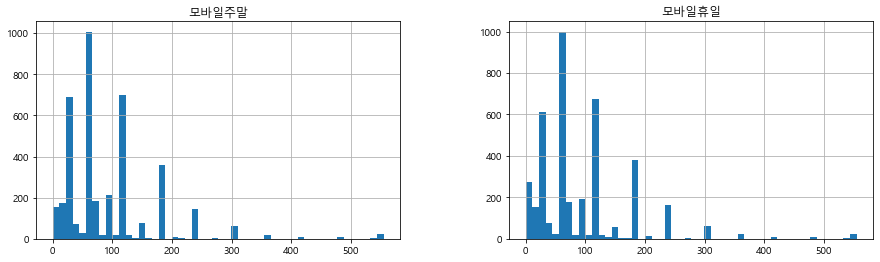

In [31]:
sk = ['모바일주말', '모바일휴일']
df[sk].hist(bins=50, figsize=(15,4))

In [32]:
for i in sk :
    print('변수명 :', i)
    print('원자료_skewness :', df[i].skew())
    print('log변환_skewness :', np.log(1 + df[i]).skew()) # -inf방지
    print('squareroot변환_skewness :', np.sqrt(df[i]).skew())
    print('*'*50)

변수명 : 모바일주말
원자료_skewness : 2.3285478340362737
log변환_skewness : -0.9822699243989281
squareroot변환_skewness : 0.8042985452979947
**************************************************
변수명 : 모바일휴일
원자료_skewness : 2.2160403737777896
log변환_skewness : -1.7017025705614766
squareroot변환_skewness : 0.49218534855428253
**************************************************


모바일주말    0.804299
모바일휴일    0.492185
dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E60FFC8C88>,
      dtype=object)

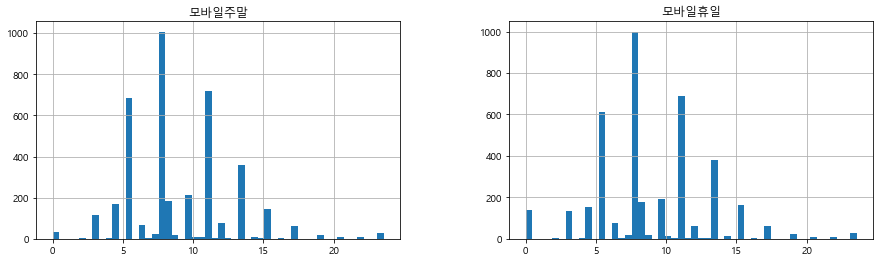

In [33]:
for i in sk :
    df[i] = np.sqrt(df[i])
df[sk].skew()
df[sk].hist(bins=50, figsize=(15,4))

In [34]:
print('The numbers of nan, inf & -inf ',df.isin([np.nan, np.inf, -np.inf]).any(1).sum())

The numbers of nan, inf & -inf  0


In [35]:
set([i for i in range(len(df))]) - set(df.index)
for i in set([i for i in range(len(df))]) - set(df.index) :
    df[df.index == i]

{871, 2230, 3203}

,성별,연령,지역,직업,가구소득,학력,주거형태,결혼,자녀수,인터넷평일,...,모바일주말,모바일휴일,TV1,TV2,TV3,TV4,드라마1,드라마2,드라마3,구매


,성별,연령,지역,직업,가구소득,학력,주거형태,결혼,자녀수,인터넷평일,...,모바일주말,모바일휴일,TV1,TV2,TV3,TV4,드라마1,드라마2,드라마3,구매


,성별,연령,지역,직업,가구소득,학력,주거형태,결혼,자녀수,인터넷평일,...,모바일주말,모바일휴일,TV1,TV2,TV3,TV4,드라마1,드라마2,드라마3,구매


In [36]:
df.reset_index(drop = True, inplace= True) 

In [37]:
df.columns[df.dtypes == 'object']
df['학력']= df['학력'].astype('category')

Index(['학력'], dtype='object')

In [38]:
df.to_pickle('../data/4장3절자료.pkl')

In [39]:
df['연령대'] = pd.cut(df['연령'], 7, labels = [1,2,3,4,5,6,7])
for i, group in df.groupby('연령대')['연령']:
    print(f'{group.min()}세 ~ {group.max()}세의 평균나이:{round(group.mean(), 2)}세')

13.0세 ~ 21.0세의 평균나이:16.89세
22.0세 ~ 29.0세의 평균나이:25.31세
30.0세 ~ 37.0세의 평균나이:33.84세
38.0세 ~ 45.0세의 평균나이:41.63세
46.0세 ~ 53.0세의 평균나이:49.45세
54.0세 ~ 61.0세의 평균나이:57.19세
62.0세 ~ 69.0세의 평균나이:64.88세


In [40]:
age_band = df.groupby('연령대')
for name, group in age_band :
    name, group.shape
    group.head(2)

(1, (464, 24))

,성별,연령,지역,직업,가구소득,학력,주거형태,결혼,자녀수,인터넷평일,...,모바일휴일,TV1,TV2,TV3,TV4,드라마1,드라마2,드라마3,구매,연령대
0,1,14.0,서울,학생재수생,6.0,중학교재학,월세,미혼,0.0,0.0,...,13.416408,4,7.0,9.0,11.0,6.0,9.0,10.0,4.0,1
1,1,14.0,서울,학생재수생,6.0,중학교재학,자가,미혼,0.0,30.0,...,6.324555,3,4.0,7.0,7.0,4.0,6.0,11.0,2.0,1


(2, (613, 24))

,성별,연령,지역,직업,가구소득,학력,주거형태,결혼,자녀수,인터넷평일,...,모바일휴일,TV1,TV2,TV3,TV4,드라마1,드라마2,드라마3,구매,연령대
33,1,22.0,서울,학생재수생,6.0,대학교재학,자가,미혼,0.0,60.0,...,7.745967,1,4.0,6.0,7.0,1.0,4.0,5.0,3.0,2
35,1,23.0,서울,학생재수생,8.0,대학교재학,자가,미혼,0.0,60.0,...,10.954451,7,8.0,9.0,7.0,1.0,4.0,4.0,5.0,2


(3, (543, 24))

,성별,연령,지역,직업,가구소득,학력,주거형태,결혼,자녀수,인터넷평일,...,모바일휴일,TV1,TV2,TV3,TV4,드라마1,드라마2,드라마3,구매,연령대
114,1,34.0,서울,사무직,5.0,대학교졸업,월세,미혼,0.0,68.876933,...,7.071068,1,10.0,7.0,7.0,1.0,4.0,4.0,3.0,3
115,1,33.0,서울,사무직,6.0,대학교졸업,자가,미혼,0.0,255.000000,...,15.491933,1,7.0,10.0,7.0,1.0,4.0,4.0,3.0,3


(4, (646, 24))

,성별,연령,지역,직업,가구소득,학력,주거형태,결혼,자녀수,인터넷평일,...,모바일휴일,TV1,TV2,TV3,TV4,드라마1,드라마2,드라마3,구매,연령대
158,1,38.0,서울,판매서비스직,11.0,대학교졸업,자가,기혼,1.0,20.0,...,13.416408,3,10.0,15.0,7.0,1.0,4.0,4.0,2.0,4
160,1,39.0,서울,무직기타,7.0,대학교졸업,자가,미혼,0.0,60.0,...,5.477226,1,2.0,3.0,7.0,1.0,4.0,4.0,3.0,4


(5, (682, 24))

,성별,연령,지역,직업,가구소득,학력,주거형태,결혼,자녀수,인터넷평일,...,모바일휴일,TV1,TV2,TV3,TV4,드라마1,드라마2,드라마3,구매,연령대
252,1,48.0,서울,사무직,7.0,대학교졸업,자가,기혼,1.0,255.000000,...,13.416408,1,3.0,4.0,6.0,9.0,10.0,4.0,1.0,5
253,1,46.0,서울,기능노무직,9.0,고등학교졸업,자가,기혼,3.0,60.689964,...,10.954451,1,7.0,7.0,7.0,1.0,4.0,4.0,2.0,5


(6, (647, 24))

,성별,연령,지역,직업,가구소득,학력,주거형태,결혼,자녀수,인터넷평일,...,모바일휴일,TV1,TV2,TV3,TV4,드라마1,드라마2,드라마3,구매,연령대
303,1,54.0,서울,기능노무직,6.0,고등학교졸업,자가,기타_이혼별거사별,2.0,60.689964,...,7.745967,1,7.0,10.0,7.0,1.0,4.0,4.0,2.0,6
305,1,54.0,서울,기능노무직,6.0,고등학교졸업,전세,기혼,1.0,60.689964,...,6.324555,1,3.0,4.0,7.0,6.0,9.0,4.0,3.0,6


(7, (402, 24))

,성별,연령,지역,직업,가구소득,학력,주거형태,결혼,자녀수,인터넷평일,...,모바일휴일,TV1,TV2,TV3,TV4,드라마1,드라마2,드라마3,구매,연령대
401,1,63.0,서울,기능노무직,4.0,고등학교졸업,자가,기혼,2.0,60.689964,...,5.477226,1,2.0,3.0,4.0,2.0,3.0,4.0,2.0,7
403,1,62.0,서울,무직기타,2.0,고등학교졸업,자가,기혼,2.0,10.000000,...,3.162278,1,2.0,3.0,8.0,1.0,4.0,4.0,4.0,7


In [41]:
age_band_20s = age_band.get_group(2)
age_band_20s.shape
df['연령대'].value_counts()

(613, 24)

5    682
6    647
4    646
2    613
3    543
1    464
7    402
Name: 연령대, dtype: int64

In [42]:
print('nan, inf & -inf 의 개수는 ?  ', df.isin([np.nan, np.inf, -np.inf]).any(1).sum())

nan, inf & -inf 의 개수는 ?   0


In [43]:
drama_col = ['드라마1', '드라마2', '드라마3']
drama_genre= df[drama_col]

In [44]:
new_col = set()
for col in df[['드라마1', '드라마2', '드라마3']] :
    new_col.update(set(df[col].unique()))
''.join(str(new_col))

'{1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0}'

In [45]:
tf = pd.DataFrame(np.zeros((df.shape[0], len(new_col))), columns = new_col)
tf

,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3992,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3993,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3994,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [46]:
for col in drama_col : 
    for prefix in new_col:
        drama_genre[prefix] = (drama_genre[col] == prefix).astype(int)
    tf += drama_genre.drop(drama_col, axis = 1)
tf.columns = ['drama' + str(int(i)) for i in new_col]
tf.head()

,drama1,drama2,drama3,drama4,drama5,drama6,drama7,drama8,drama9,drama10,drama11,drama12,drama13,drama14,drama15,drama16
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [47]:
df = pd.merge(df.drop(drama_col, axis=1), tf, left_index=True, 
              right_index=True, how='left')

In [48]:
tv_col = ['TV1', 'TV2', 'TV3', 'TV4']
tv_genre= df[tv_col]
new_col = set()
for col in tv_genre :
    new_col.update(set(df[col].unique()))

In [49]:
tf = pd.DataFrame(np.zeros((tf.shape[0], len(new_col))), columns = new_col)
for col in tv_col : 
    for prefix in new_col:
        tv_genre[prefix] = (tv_genre[col] == prefix).astype(int)
    tf += tv_genre.drop(tv_col, axis = 1)
tf.columns = ['tv' + str(int(i)) for i in new_col]
df = pd.merge(df.drop(tv_col, axis=1), tf, left_index=True, 
              right_index=True, how='left')

In [50]:
df.columns
print('The numbers of nan, inf & -inf:', df.isin([np.nan, np.inf, -np.inf]).any(1).sum())
dict(df.dtypes) == 'object'

Index(['성별', '연령', '지역', '직업', '가구소득', '학력', '주거형태', '결혼', '자녀수', '인터넷평일',
       '인터넷주말', '인터넷휴일', '모바일평일', '모바일주말', '모바일휴일', '구매', '연령대', 'drama1',
       'drama2', 'drama3', 'drama4', 'drama5', 'drama6', 'drama7', 'drama8',
       'drama9', 'drama10', 'drama11', 'drama12', 'drama13', 'drama14',
       'drama15', 'drama16', 'tv1', 'tv2', 'tv3', 'tv4', 'tv5', 'tv6', 'tv7',
       'tv8', 'tv9', 'tv10', 'tv11', 'tv12', 'tv13', 'tv14', 'tv15', 'tv16',
       'tv17'],
      dtype='object')

The numbers of nan, inf & -inf: 0


False

In [51]:
df.to_pickle('../data/4장자료.pkl')

In [52]:
tf = pd.read_pickle('../data/4장3절자료.pkl')
tf.head()
tf.shape

,성별,연령,지역,직업,가구소득,학력,주거형태,결혼,자녀수,인터넷평일,...,모바일주말,모바일휴일,TV1,TV2,TV3,TV4,드라마1,드라마2,드라마3,구매
0,1,14.0,서울,학생재수생,6.0,중학교재학,월세,미혼,0.0,0.000000,...,12.247449,13.416408,4,7.0,9.0,11.0,6.0,9.0,10.0,4.0
1,1,14.0,서울,학생재수생,6.0,중학교재학,자가,미혼,0.0,30.000000,...,6.324555,6.324555,3,4.0,7.0,7.0,4.0,6.0,11.0,2.0
2,1,14.0,서울,학생재수생,6.0,중학교재학,전세,미혼,0.0,90.000000,...,13.416408,13.416408,4,6.0,7.0,9.0,1.0,4.0,12.0,5.0
3,1,14.0,서울,학생재수생,8.0,중학교재학,자가,미혼,0.0,68.876933,...,7.745967,7.745967,6,7.0,9.0,10.0,1.0,4.0,4.0,2.0
4,1,14.0,서울,학생재수생,9.0,중학교재학,자가,미혼,0.0,0.000000,...,13.416408,13.416408,4,7.0,9.0,7.0,4.0,5.0,10.0,3.0


(3997, 23)

In [53]:
from sklearn.feature_extraction.text import CountVectorizer
tf['드라마'] = 0
drama_col = ['드라마1', '드라마2', '드라마3']
drama_genre= tf[drama_col]
for i, j in drama_genre.iterrows() :
    tf['드라마'][i] = [str(int(i)*10) for i in j.values]
tf

,성별,연령,지역,직업,가구소득,학력,주거형태,결혼,자녀수,인터넷평일,...,모바일휴일,TV1,TV2,TV3,TV4,드라마1,드라마2,드라마3,구매,드라마
0,1,14.0,서울,학생재수생,6.0,중학교재학,월세,미혼,0.0,0.000000,...,13.416408,4,7.0,9.0,11.0,6.0,9.0,10.0,4.0,"[60, 90, 100]"
1,1,14.0,서울,학생재수생,6.0,중학교재학,자가,미혼,0.0,30.000000,...,6.324555,3,4.0,7.0,7.0,4.0,6.0,11.0,2.0,"[40, 60, 110]"
2,1,14.0,서울,학생재수생,6.0,중학교재학,전세,미혼,0.0,90.000000,...,13.416408,4,6.0,7.0,9.0,1.0,4.0,12.0,5.0,"[10, 40, 120]"
3,1,14.0,서울,학생재수생,8.0,중학교재학,자가,미혼,0.0,68.876933,...,7.745967,6,7.0,9.0,10.0,1.0,4.0,4.0,2.0,"[10, 40, 40]"
4,1,14.0,서울,학생재수생,9.0,중학교재학,자가,미혼,0.0,0.000000,...,13.416408,4,7.0,9.0,7.0,4.0,5.0,10.0,3.0,"[40, 50, 100]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3992,2,58.0,광주전라제주,기능노무직,1.0,중학교졸업,자가,기타_이혼별거사별,2.0,60.689964,...,7.745967,1,2.0,3.0,4.0,1.0,4.0,8.0,4.0,"[10, 40, 80]"
3993,2,63.0,광주전라제주,전업주부,7.0,고등학교졸업,자가,기혼,2.0,60.689964,...,5.477226,4,7.0,7.0,7.0,1.0,4.0,4.0,4.0,"[10, 40, 40]"
3994,2,61.0,광주전라제주,기능노무직,4.0,중학교졸업,전세,기혼,1.0,60.689964,...,5.477226,1,4.0,6.0,7.0,1.0,4.0,5.0,4.0,"[10, 40, 50]"
3995,2,67.0,광주전라제주,기능노무직,2.0,중학교졸업,자가,기타_이혼별거사별,2.0,60.689964,...,5.477226,1,4.0,7.0,7.0,1.0,4.0,4.0,4.0,"[10, 40, 40]"


In [54]:
corpus = []
for i in tf['드라마']:
    corpus.append(' '.join(i))
len(corpus)
corpus[0:10]

3997

['60 90 100',
 '40 60 110',
 '10 40 120',
 '10 40 40',
 '40 50 100',
 '10 40 40',
 '10 40 40',
 '10 40 40',
 '10 40 40',
 '10 40 40']

In [55]:
vect = CountVectorizer()

In [56]:
X = vect.fit_transform(corpus)
X
X.toarray()

<3997x16 sparse matrix of type '<class 'numpy.int64'>'
	with 9940 stored elements in Compressed Sparse Row format>

array([[0, 1, 0, ..., 0, 0, 1],
       [0, 0, 1, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [57]:
for key, val in vect.vocabulary_.items():
    print("key = {key}, value={value}".format(key=key,value=val))

key = 60, value=12
key = 90, value=15
key = 100, value=1
key = 40, value=10
key = 110, value=2
key = 10, value=0
key = 120, value=3
key = 50, value=11
key = 80, value=14
key = 130, value=4
key = 20, value=8
key = 30, value=9
key = 140, value=5
key = 70, value=13
key = 150, value=6
key = 160, value=7


In [58]:
cols = sorted(vect.vocabulary_.items(), key=(lambda x:x[1]), reverse=False)
cols = ['drama' + str(int(int(i[0])/10)) for i in cols]
','.join(cols)
drama = pd.DataFrame(X.toarray(), columns =cols)
drama

'drama1,drama10,drama11,drama12,drama13,drama14,drama15,drama16,drama2,drama3,drama4,drama5,drama6,drama7,drama8,drama9'

,drama1,drama10,drama11,drama12,drama13,drama14,drama15,drama16,drama2,drama3,drama4,drama5,drama6,drama7,drama8,drama9
0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0
2,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3992,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3993,1,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0
3994,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0
3995,1,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0


In [59]:
pd.merge(tf.drop(tv_col, axis=1), drama, left_index=True, right_index=True, how='left')

,성별,연령,지역,직업,가구소득,학력,주거형태,결혼,자녀수,인터넷평일,...,drama15,drama16,drama2,drama3,drama4,drama5,drama6,drama7,drama8,drama9
0,1,14.0,서울,학생재수생,6.0,중학교재학,월세,미혼,0.0,0.000000,...,0,0,0,0,0,0,1,0,0,1
1,1,14.0,서울,학생재수생,6.0,중학교재학,자가,미혼,0.0,30.000000,...,0,0,0,0,1,0,1,0,0,0
2,1,14.0,서울,학생재수생,6.0,중학교재학,전세,미혼,0.0,90.000000,...,0,0,0,0,1,0,0,0,0,0
3,1,14.0,서울,학생재수생,8.0,중학교재학,자가,미혼,0.0,68.876933,...,0,0,0,0,2,0,0,0,0,0
4,1,14.0,서울,학생재수생,9.0,중학교재학,자가,미혼,0.0,0.000000,...,0,0,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3992,2,58.0,광주전라제주,기능노무직,1.0,중학교졸업,자가,기타_이혼별거사별,2.0,60.689964,...,0,0,0,0,1,0,0,0,1,0
3993,2,63.0,광주전라제주,전업주부,7.0,고등학교졸업,자가,기혼,2.0,60.689964,...,0,0,0,0,2,0,0,0,0,0
3994,2,61.0,광주전라제주,기능노무직,4.0,중학교졸업,전세,기혼,1.0,60.689964,...,0,0,0,0,1,1,0,0,0,0
3995,2,67.0,광주전라제주,기능노무직,2.0,중학교졸업,자가,기타_이혼별거사별,2.0,60.689964,...,0,0,0,0,2,0,0,0,0,0


In [60]:
df = pd.read_pickle('../data/4장자료.pkl')
df['구매'].value_counts(normalize=True)

3.0    0.379284
4.0    0.244183
2.0    0.215161
5.0    0.089817
1.0    0.058544
6.0    0.013010
Name: 구매, dtype: float64

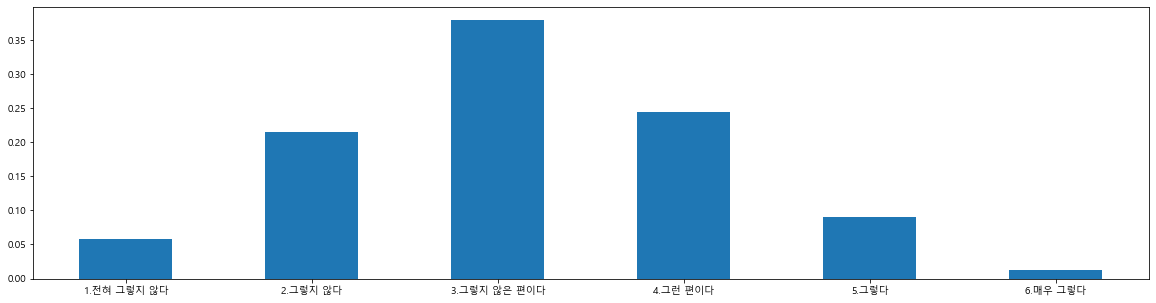

In [61]:
map_dict={1:'1.전혀 그렇지 않다', 2:'2.그렇지 않다', 3:'3.그렇지 않은 편이다',
          4:'4.그런 편이다', 5:'5.그렇다', 6:'6.매우 그렇다'}
tf = df['구매'].value_counts(normalize=True).rename(index=map_dict)
tf.sort_index(inplace=True)
tf.plot(kind='bar', rot='360', figsize=(20,5))

In [62]:
tf = df.copy()

In [63]:
tf.columns

Index(['성별', '연령', '지역', '직업', '가구소득', '학력', '주거형태', '결혼', '자녀수', '인터넷평일',
       '인터넷주말', '인터넷휴일', '모바일평일', '모바일주말', '모바일휴일', '구매', '연령대', 'drama1',
       'drama2', 'drama3', 'drama4', 'drama5', 'drama6', 'drama7', 'drama8',
       'drama9', 'drama10', 'drama11', 'drama12', 'drama13', 'drama14',
       'drama15', 'drama16', 'tv1', 'tv2', 'tv3', 'tv4', 'tv5', 'tv6', 'tv7',
       'tv8', 'tv9', 'tv10', 'tv11', 'tv12', 'tv13', 'tv14', 'tv15', 'tv16',
       'tv17'],
      dtype='object')

In [64]:
tf['구매의향'] = 0
buy = tf[((tf['구매'] == 4) | (tf['구매'] == 5) | (tf['구매'] == 6))].index
tf.loc[buy, '구매의향'] = 1
del tf['구매']
tf = tf.rename(columns={'구매의향': '구매'})
print('구매비율 {:0.2f}%'.format(tf['구매'].value_counts()[1]/len(tf)*100))
tf.to_pickle('../data/4장자료_01.pkl')

구매비율 34.70%


In [65]:
tf = df.copy()

In [66]:
tf['구매의향'] = 0
buy = tf[((tf['구매'] == 5) | (tf['구매'] == 6))].index
tf.loc[buy, '구매의향'] = 1
del tf['구매']
tf = tf.rename(columns={'구매의향': '구매'})
print('구매비율 {:0.2f}%'.format(tf['구매'].value_counts()[1]/len(tf)*100))
tf.to_pickle('../data/4장자료_02.pkl')

구매비율 10.28%
